# HomeWork FRA502 Optimization
Implement Optimization on Rastrigin function to find the global minimum.

In [2]:
# Imports
import numpy as np # Linear Algebra
import scipy # For matrix exponential
import matplotlib.pyplot as plt # Plotting

## Rastrigin function
Initial rastrigin function to rady for optimization.
in this homework try to solve with this define function

$f(x) = 10d + \sum_{i=1}^{d} (x_i^2 - 10\cos(2\pi x_i))$

where:
- x is a numpy array of shape (d, 1)
- A = 10
- d is the dimension of x
- $x_i$ is the i-th element of x

80


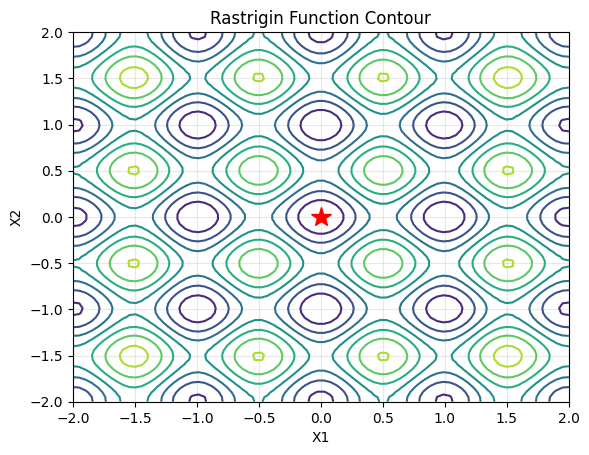

In [3]:
# Rastrigin function
# x is a numpy array of shape (d, 1)
def f(x):
    A = 10.
    d = x.shape[0]
    return A * d + np.sum(x.T @ x) - A * np.sum(np.cos(2. * np.pi * x))

# clear previous plot
plt.close()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Contour plot set to view -2 to 2 in both dimensions with 80 steps
N = 80 # 80 steps
x1 = np.linspace(-2., 2., N)
x2 = np.linspace(-2., 2., N)

# Create a meshgrid for contour plot
X, Y = np.meshgrid(x1, x2)
# Compute the function value on the grid
val = np.zeros((N, N))
# Loop over each point in the grid to compute f
for i in range(N):
    for j in range(N):
        xx = np.zeros((2, 1))
        xx[0] = X[i, j]
        xx[1] = Y[i, j]
        val[i, j] = f(xx)

# Show the contour plot length
print(len(val)) 
# Plot the computed values
ax.set_title('Rastrigin Function Contour')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.plot(0, 0, 'r*', markersize=15, label='Global Minimum (0,0)')
CS = ax.contour(x1.reshape((N,)), x2.reshape((N,)), val)
ax.grid(True, alpha=0.3)


# Try to 3d plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, val, cmap='viridis', edgecolor='none')
# ax.set_title('Rastrigin Function Surface')
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('f(X1, X2)')
# plt.show()

### Newton's Method

Let's remember the Newton's method for **root finding**:

1) We first linearize around the current estimate $\boldsymbol{x}_k$:

$f(\boldsymbol{x}_k + \Delta\boldsymbol{x})\approx f(\boldsymbol{x}_k) + \frac{\partial f}{\partial\boldsymbol{x}}\Big|_{\boldsymbol{x}_k}\Delta\boldsymbol{x}$

2) We then set $f(\boldsymbol{x}_k + \Delta\boldsymbol{x}) = 0$ and solve for $\Delta\boldsymbol{x}$:

$f(\boldsymbol{x}_k) + \frac{\partial f}{\partial\boldsymbol{x}}\Big|_{\boldsymbol{x}_k}\Delta\boldsymbol{x} = 0$

$\Delta\boldsymbol{x} = -\Big(\frac{\partial f}{\partial\boldsymbol{x}}\Big|_{\boldsymbol{x}_k}\Big)^{-1}f(\boldsymbol{x}_k)$

3) We apply the correction $\boldsymbol{x}_{k+1} = \boldsymbol{x}_k + \Delta\boldsymbol{x}$

4) Repeat until convergence

Let's try the newton method on our `restrigin function`!

In [4]:
def gradient_f(x):
    A = 10.
    return 2 * x + A * 2 * np.pi * np.sin(2 * np.pi * x)

def hessian_f(x):
    A = 10.
    diagonal_elements = 2 + 4 * (np.pi**2) * A * np.cos(2 * np.pi * x.T)
    return np.diag(diagonal_elements.flatten())

In [5]:
def finite_diff(f, z, M, eps=1e-4):
    N = z.shape[0]
    jac = np.zeros((M, N))
    v = np.zeros((N, 1))
    for i in range(N):
        zp = np.copy(z)
        v[i] = eps
        zp = zp + v
        zm = np.copy(z)
        v[i] = -eps
        zm = zm + v
        jac[:, i:i+1] = (((f(zp) - f(zm))) / (2. * eps)).reshape((-1, 1))
        v[i] = 0  # Reset v[i]
    return jac

print("Testing gradient and Hessian...")
for i in range(100):
    x = np.random.randn(2, 1)
    
    # Test gradient (add .T to gradient_f)
    assert(np.isclose(finite_diff(f, x, 1), gradient_f(x).T, rtol=1e-3, atol=1e-3).all())
    
    # Test Hessian
    assert(np.isclose(finite_diff(gradient_f, x, x.shape[0]), hessian_f(x), rtol=1e-3, atol=1e-3).all())

print("✅ All 100 tests passed! Your gradient and Hessian are correct!")

Testing gradient and Hessian...
✅ All 100 tests passed! Your gradient and Hessian are correct!


Initial value: 14.580169943749475


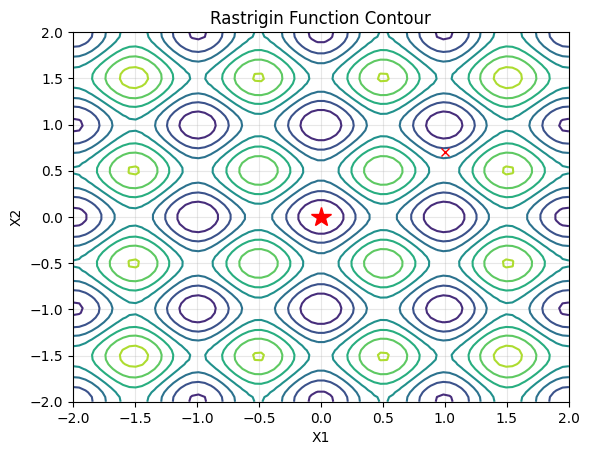

In [6]:
# Initial point
x0 = np.array([[1., 0.7]]).T


ax.plot(x0[0, 0], x0[1, 0], 'rx')

print("Initial value:", f(x0))

fig # show figure again with updated point(s)

In [7]:
def newton_step(x):
    grad = gradient_f(x) 
    hessian = hessian_f(x)
    dx = -np.linalg.inv(hessian) @ grad
    return x + dx

np.random.seed(10)


x = np.random.randn(2, 1)
print(f"Starting point x: {x.T}")
xn = newton_step(x)
print(f"After Newton step: {xn.T}")
print(f"Expected: [[1.63122303, -0.0027116]]")
assert(np.isclose(xn, np.array([[1.63122303, -0.0027116]]).T, rtol=1e-3, atol=1e-3).all())



x = np.random.randn(2, 1)
print(f"Starting point x: {x.T}")
xn = newton_step(x)
print(f"After Newton step: {xn.T}")
print(f"Expected: [[-1.50668149, 0.]]")
assert(np.isclose(xn, np.array([[-1.50668149, 0.]]).T, rtol=1e-3, atol=1e-3).all())



x = np.random.randn(2, 1)
print(f"Starting point x: {x.T}")
xn = newton_step(x)
print(f"After Newton step: {xn.T}")
print(f"Expected: [[0.47265641, 0.11992915]]")
assert(np.isclose(xn, np.array([[0.47265641, 0.11992915]]).T, rtol=1e-3, atol=1e-3).all())


np.random.seed(None)


Starting point x: [[1.3315865  0.71527897]]
After Newton step: [[ 1.63122303 -0.0027116 ]]
Expected: [[1.63122303, -0.0027116]]
Starting point x: [[-1.54540029 -0.00838385]]
After Newton step: [[-1.50668149e+00  7.72420239e-06]]
Expected: [[-1.50668149, 0.]]
Starting point x: [[ 0.62133597 -0.72008556]]
After Newton step: [[0.47265641 0.11992915]]
Expected: [[0.47265641, 0.11992915]]


x: [[0.99495948 0.21367445]] -> 8.777979354707096


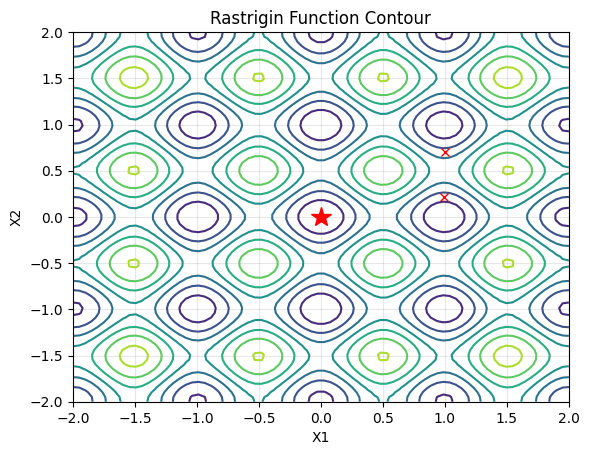

In [8]:
# Let's start solving
x = np.copy(x0)
# iterate
x = newton_step(x)
print("x:", x.T, "->", f(x))

ax.plot(x[0, 0], x[1, 0], 'rx', label='Newton Step 1')

fig # show figure again with updated point(s)


In [9]:
# # Let's start solving
# x = np.copy(x0)
# # iterate
# x = newton_step(x)
# print("x:", x.T, "->", f(x))

# ax.plot(x[0, 0], x[1, 0], 'go', markersize=8, label='Newton Step 1')

# fig # show figure again with updated point(s)




def optimize_newton(x0, max_iter=100, tol=1e-6, verbose=True):
    """
    Full Newton's Method optimization
    
    Parameters:
    -----------
    x0 : initial point, shape (d, 1)
    max_iter : maximum iterations
    tol : convergence tolerance (gradient norm)
    verbose : print progress
    
    Returns:
    --------
    x : optimized point
    history : list of all points visited
    """
    x = x0.copy()
    history = [x.copy()]
    
    if verbose:
        print("Starting Newton's Method Optimization")
        print(f"Initial point: {x.T}")
        print(f"Initial f(x): {f(x):.6f}\n")
    
    for k in range(max_iter):
        # Compute gradient
        grad = gradient_f(x)
        grad_norm = np.linalg.norm(grad)
        
        if verbose:
            print(f"Iteration {k+1}: f(x) = {f(x):.6f}, ||grad|| = {grad_norm:.6e}")
        
        # Check convergence
        if grad_norm < tol:
            if verbose:
                print(f"\n✅ Converged in {k+1} iterations!")
            break
        
        # Take Newton step
        x = newton_step(x)
        history.append(x.copy())
    
    if verbose:
        print(f"\n=== Final Results ===")
        print(f"Final point: {x.T}")
        print(f"Final f(x): {f(x):.6f}")
        print(f"Final ||grad||: {np.linalg.norm(gradient_f(x)):.6e}")
        print(f"Distance from origin [0,0]: {np.linalg.norm(x):.6f}")
    
    return x, history

In [10]:
x = np.copy(x0)
# Run optimization
x_opt, history = optimize_newton(x, max_iter=50, tol=1e-6)

# Check if we found global minimum
print("\n=== Verification ===")
print(f"Global minimum should be: [0, 0] with f(x) = 0")
print(f"We found: {x_opt.T} with f(x) = {f(x_opt):.6f}")

if np.linalg.norm(x_opt) < 0.1:
    print("✅ Found global minimum!")
else:
    print("⚠️ Found a local minimum (not global)")

Starting Newton's Method Optimization
Initial point: [[1.  0.7]]
Initial f(x): 14.580170

Iteration 1: f(x) = 14.580170, ||grad|| = 5.839091e+01
Iteration 2: f(x) = 8.777979, ||grad|| = 6.162973e+01
Iteration 3: f(x) = 20.911374, ||grad|| = 1.610290e+01
Iteration 4: f(x) = 21.246083, ||grad|| = 3.423890e-01
Iteration 5: f(x) = 21.246232, ||grad|| = 1.852497e-05
Iteration 6: f(x) = 21.246232, ||grad|| = 5.064418e-14

✅ Converged in 6 iterations!

=== Final Results ===
Final point: [[ 0.99495864 -0.50254604]]
Final f(x): 21.246232
Final ||grad||: 5.064418e-14
Distance from origin [0,0]: 1.114673

=== Verification ===
Global minimum should be: [0, 0] with f(x) = 0
We found: [[ 0.99495864 -0.50254604]] with f(x) = 21.246232
⚠️ Found a local minimum (not global)


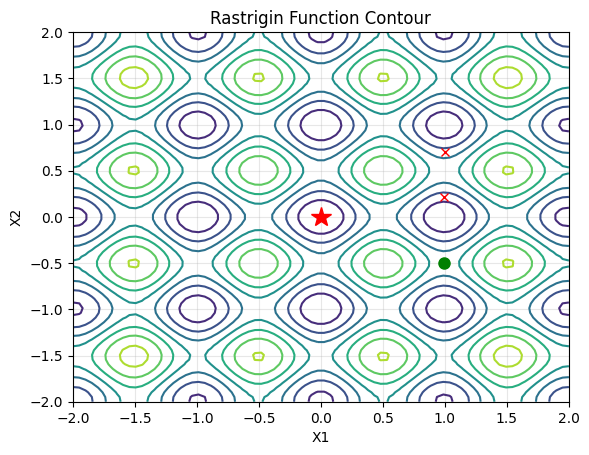

In [11]:
ax.plot(x_opt[0, 0], x_opt[1, 0], 'go', markersize=8, label='Newton Step 1')

fig # show figure again with updated point(s)